<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/Lecture_8_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialization

In [1]:
# Import make_moon dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.4, random_state=42)

# Divide in test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Helper function for plotting decision boundaries

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Bagging classifier accuracy :  0.832


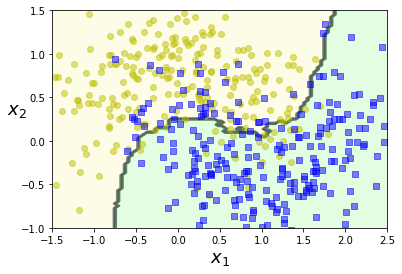

In [11]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

# Fit Bagging Classifier
bag_clf.fit(X_train, y_train)

# Prediction Bagging Classifier
y_pred_bagging = bag_clf.predict(X_test)

# Accuracy Score for the Baggin Classifier
from sklearn.metrics import accuracy_score
print("Bagging classifier accuracy : ",accuracy_score(y_test, y_pred_bagging))
plot_decision_boundary(bag_clf, X, y)

Random classifier accuracy :  0.856


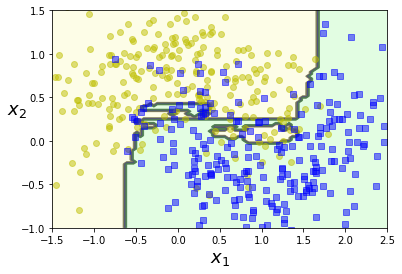

In [10]:

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rnd_clf = RandomForestClassifier(
    
    #DecisionTreeClassifier(bag_clf),
    n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

# Taking inspiration from the previous cell,
# try to fit the Random Forest Classifier, predict and calculate the accuracy score
# Fit it 
# ...
rnd_clf.fit(X_train, y_train)
# Make predictions on the classifier

y_pred_random = rnd_clf.predict(X_test)
# Print the accuracy score 
# ....
# Accuracy Score for the Random Classifier
from sklearn.metrics import accuracy_score
print("Random classifier accuracy : ",accuracy_score(y_test, y_pred_random))
plot_decision_boundary(rnd_clf, X, y)

Ada classifier accuracy :  0.856


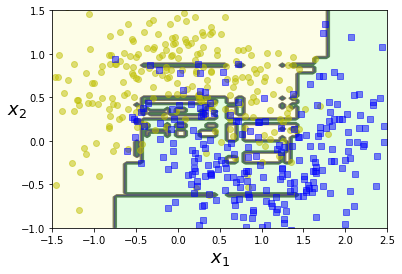

In [9]:
# Adaptive Boosting AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=400,
    algorithm="SAMME.R", learning_rate=1, random_state=42)

# Taking inspiration from the previous cell,
# try to fit the AdaBoost Classifier, predict and calculate the accuracy score
# Fit it 
# ....
ada_clf.fit(X_train, y_train)

# Make predictions on the classifier
# ....
y_pred_ada = ada_clf.predict(X_test)
# Print the accuracy score 
from sklearn.metrics import accuracy_score
print("Ada classifier accuracy : ",accuracy_score(y_test, y_pred_random))

#Plot the decision classification for this ADA model how it fits
# ....
plot_decision_boundary(ada_clf, X, y)


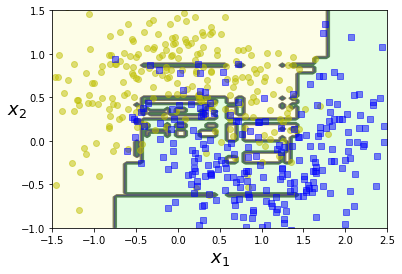

In [ ]:
# Plot the final representation

plot_decision_boundary(ada_clf, X, y)